In [1]:
# Packages required
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rcParams
from astropy.io import fits
import pandas as pd
import os
#Change to your path
os.chdir("/Users/alau/Data/amiral_criterion_map/")
from amiral import instructment, utils, parameter, gradient, minimisation, array
from scipy.optimize import minimize 
%matplotlib inline
from IPython.display import HTML

## A single criterion map

[0.1     0.10625 0.1125  0.11875 0.125   0.13125 0.1375  0.14375 0.15
 0.15625 0.1625  0.16875 0.175   0.18125 0.1875  0.19375 0.2     0.20625
 0.2125  0.21875 0.225   0.23125 0.2375  0.24375 0.25   ]
[0.1    0.2125 0.325  0.4375 0.55   0.6625 0.775  0.8875 1.     1.1125
 1.225  1.3375 1.45   1.5625 1.675  1.7875 1.9    2.0125 2.125  2.2375
 2.35   2.4625 2.575  2.6875 2.8   ]


Estimated PSF parameter: r0 - 0.091667 ampl - 0.108333 J - 2868257.888871 
Relative erorr (%)- r0 -4.166333 sig2 - 45.833667 


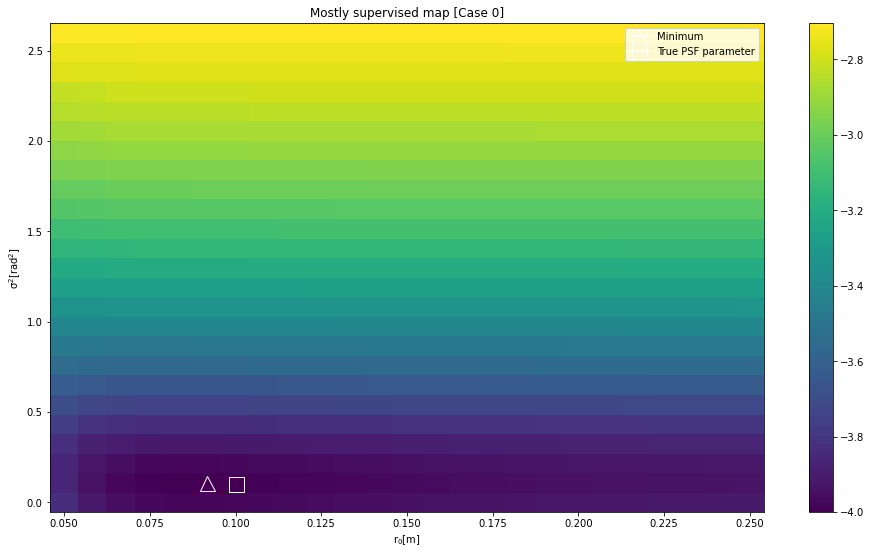

In [66]:
nOut = 0

# Checking only 1 image 
fname = '/Users/alau/Data/amiral_criterion_map/_noise_'+str(nOut)+'_python.csv'
outputname = "all_fixed_noise_"+str(nOut)+".pdf"
cwd = "/Users/alau/Data/amiral_criterion_map/VESTA/2021mar19/p_2_91/"

true_r0 = 0.1
true_sig2 = 0.1

# df = pd.read_csv(fname)
size_map = 25

crit_map_IDL = fits.open(cwd+"mu_rho0_"+str(nOut)+"_IDL"+".fits")
crit_map_IDL = crit_map_IDL[0].data 

crit_map_python_0 = fits.open(cwd+"mu_rho0_test_2021mar19_"+str(nOut)+".fits")
crit_map_python_0 = crit_map_python_0[0].data 

size_map = 25

J0 = (crit_map_python_0-np.min(crit_map_python_0))/np.min(crit_map_python_0) + 1e-4


rcParams['figure.figsize'] = 16,9
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0.05,0.25, size_map)
dx = (x[1]-x[0])/2
y = np.linspace(0,2.6, size_map)
dy = (y[1]-y[0])/2

ind_min_py = np.where (crit_map_python_0 == np.min(crit_map_python_0))

print("Estimated PSF parameter: r0 - %f ampl - %f J - %f " %(x[ind_min_py[1]],y[ind_min_py[0]],crit_map_python_0[ind_min_py] ))

im = ax.pcolormesh(x,y,np.log10(J0),linewidth=1, shading='auto')
ax.set_xlabel(r'$\mathrm{r_0[m]}$')
ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
ax.set_title('Mostly supervised map [Case 0]')
ax.plot(x[ind_min_py[1]],y[ind_min_py[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Minimum')
ax.plot(0.1,0.1, marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')
ax.legend(loc='upper right')
cbar = fig.colorbar(im, ax=ax)

err_r0 = (0.091667+dx-true_r0)/ true_r0
err_sig2 = (true_sig2-0.108333+dy)/ true_sig2

print("Relative erorr (%%)- r0 %f sig2 - %f " %(100*err_r0,100*err_sig2))


fig.savefig("mu_rho0_test_map_0.pdf", bbox_inches='tight')

No handles with labels found to put in legend.


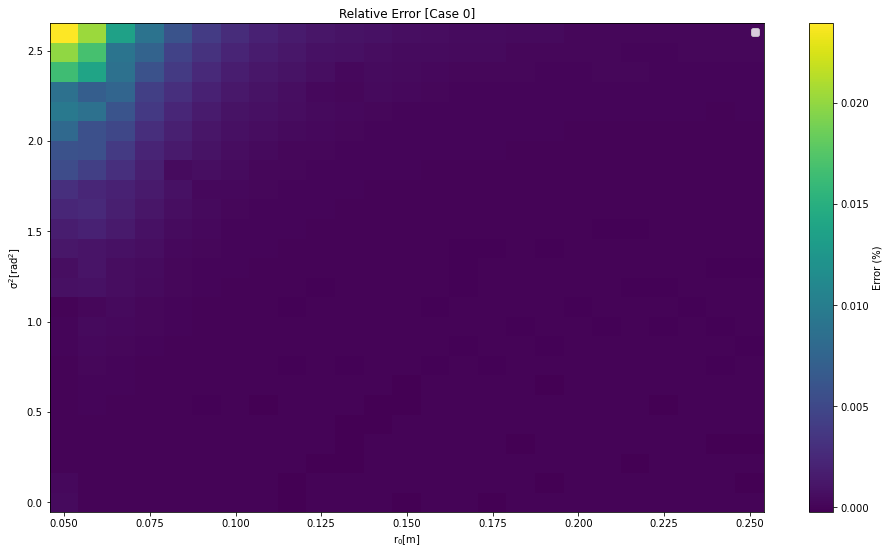

In [3]:
rcParams['figure.figsize'] = 16,9
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0.05,0.25, size_map) 
y = np.linspace(0,2.6, size_map)

err = (crit_map_python_0 - crit_map_IDL) / crit_map_IDL



im = ax.pcolormesh(x,y,100*err,linewidth=1, shading='auto')

ax.set_xlabel(r'$\mathrm{r_0[m]}$')
ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
ax.set_title('Relative Error [Case 0]')

ax.legend(loc='upper right')
cbar = fig.colorbar(im, ax=ax, label = 'Error (%)')

fig.savefig("err_mu_rho0_test_map_0.pdf", bbox_inches='tight')

Estimated PSF parameter: r0 - 0.083333 ampl - 0.216667 
Relative erorr (%)- r0 -12.500333 sig2 - -32.291583 


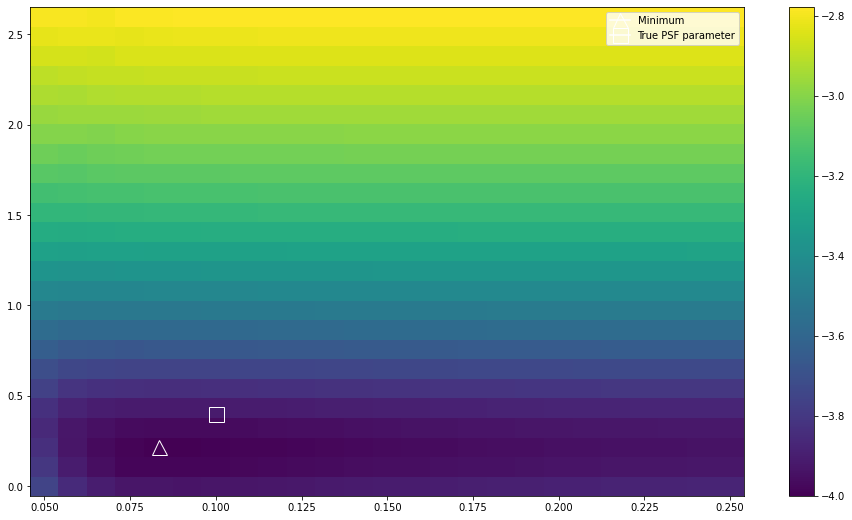

In [67]:
nOut = 1

# Checking only 1 image 
fname = '/Users/alau/Data/amiral_criterion_map/_noise_'+str(nOut)+'_python.csv'
outputname = "all_fixed_noise_"+str(nOut)+".pdf"
cwd = "/Users/alau/Data/amiral_criterion_map/VESTA/2021mar17/supervised_map/"

true_r0 = 0.1
true_sig2 = 0.4

# df = pd.read_csv(fname)
size_map = 25

x = np.linspace(0.05,0.25, size_map)
dx = (x[1]-x[0])/2
y = np.linspace(0,2.6, size_map)
dy = (y[1]-y[0])/2

# crit_map_IDL = fits.open(cwd+"all_fixed_noise_"+str(nOut)+"_IDL"+".fits")
# crit_map_IDL = crit_map_IDL[0].data 

# plt.imshow(crit_map_IDL)


# crit_map_IDL = fits.open(cwd+"all_fixed_noise_"+str(nOut)+"_IDL"+".fits")
# crit_map_IDL = crit_map_IDL[0].data 

crit_map_python_1 = fits.open(cwd+"mu_rho0_test_2021mar19_"+str(nOut)+".fits")
crit_map_python_1 = crit_map_python_1[0].data 


J0_1 = (crit_map_python_1-np.min(crit_map_python_1))/np.min(crit_map_python_1) + 1e-4

fig = plt.figure()
ax = fig.add_subplot(111)

ind_min_py = np.where (crit_map_python_1 == np.min(crit_map_python_1))
print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind_min_py[1]],y[ind_min_py[0]]))

im = ax.pcolormesh(x,y,np.log10(J0_1),linewidth=1, shading='auto')
ax.plot(x[ind_min_py[1]],y[ind_min_py[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Minimum')
ax.plot(0.1,0.4, marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')
ax.legend(loc='upper right')
cbar = fig.colorbar(im, ax=ax)


err_r0 = (0.083333-true_r0+dx)/ true_r0
err_sig2 = (0.216667-true_sig2+dy)/ true_sig2

print("Relative erorr (%%)- r0 %f sig2 - %f " %(100*err_r0,100*err_sig2))


Estimated PSF parameter: r0 - 0.091667 ampl - 0.650000 J - 2845603.324287 
Relative erorr (%)- r0 -8.333000 sig2 - -7.142857 


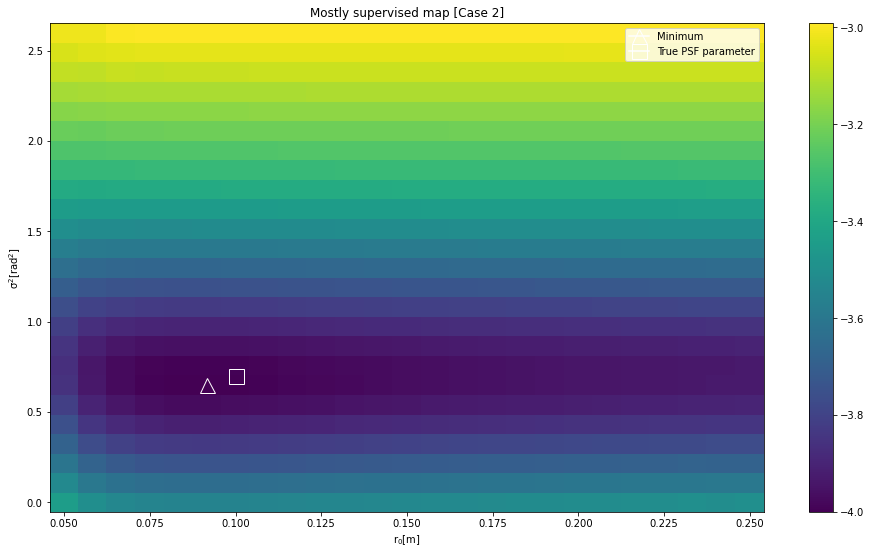

In [49]:
nOut = 2

# Checking only 1 image 
fname = '/Users/alau/Data/amiral_criterion_map/_noise_'+str(nOut)+'_python.csv'
outputname = "all_fixed_noise_"+str(nOut)+".pdf"
cwd = "/Users/alau/Data/amiral_criterion_map/VESTA/2021mar19/"

true_r0 = 0.1
true_sig2 = 0.7

# df = pd.read_csv(fname)
size_map = 25

# crit_map_IDL = fits.open(cwd+"mu_rho0_"+str(nOut)+"_IDL"+".fits")
# crit_map_IDL = crit_map_IDL[0].data 

crit_map_python_2 = fits.open(cwd+"mu_rho0_test_2021mar19_"+str(nOut)+".fits")
crit_map_python_2 = crit_map_python_2[0].data 

size_map = 25

J0_2 = (crit_map_python_2-np.min(crit_map_python_2))/np.min(crit_map_python_2) + 1e-4


rcParams['figure.figsize'] = 16,9
fig = plt.figure()
ax = fig.add_subplot(111)

x = np.linspace(0.05,0.25, size_map) 
y = np.linspace(0,2.6, size_map)

ind_min_py = np.where (crit_map_python_2 == np.min(crit_map_python_2))

print("Estimated PSF parameter: r0 - %f ampl - %f J - %f " %(x[ind_min_py[1]],y[ind_min_py[0]],crit_map_python_2[ind_min_py] ))

im = ax.pcolormesh(x,y,np.log10(J0_2),linewidth=1, shading='auto')
ax.set_xlabel(r'$\mathrm{r_0[m]}$')
ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
ax.set_title('Mostly supervised map [Case 2]')
ax.plot(x[ind_min_py[1]],y[ind_min_py[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Minimum')
ax.plot(true_r0,true_sig2, marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')
ax.legend(loc='upper right')
cbar = fig.colorbar(im, ax=ax)

err_r0 = (0.091667-true_r0)/ true_r0
err_sig2 = (0.650000-true_sig2)/ true_sig2

print("Relative erorr (%%)- r0 %f sig2 - %f " %(100*err_r0,100*err_sig2))


# fig.savefig("mu_rho0_test_map_2.pdf", bbox_inches='tight')

In [6]:
# new_df = df.filter(['r0','amplitude','J'], axis=1)
# new_df['r0']

In [7]:
# x = np.linspace(new_df['r0'].min(),new_df['r0'].max(), size_map)
# y = np.linspace(new_df['amplitude'].min(),new_df['amplitude'].max(), size_map)

# z = new_df['J']
# zz = np.zeros((size_map,size_map))

# for i in range (size_map):
#     for j in range (size_map):
#         zz[j,i] = z[i*size_map+j]
      
        
# # norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True) 
# fig, ax1 =  plt.subplots()
# im = ax1.pcolormesh(x,y,np.log10(crit_map_python),edgecolors='k',shading='auto')
# fig.colorbar(im, ax=ax1)

In [8]:
# ind_min = df[['J']].idxmin() 

In [9]:
# df['r0'][ind_min], df['amplitude'][ind_min], df['J'][ind_min]

In [10]:
# x = np.linspace(df['r0'].min(),df['r0'].max(), size_map)
# y = np.linspace(df['amplitude'].min(),df['amplitude'].max(), size_map)

# z = new_df['J']
# zz = np.zeros((size_map,size_map))

# for i in range (size_map):
#     for j in range (size_map):
#         zz[j,i] = z[i*size_map+j]

        
# rcParams.update({'font.size': 14})
# fig, ax1 =  plt.subplots(figsize=(13, 8))
# im = ax1.pcolormesh(x,y,np.log10(crit_map_python),edgecolor='k',linewidth=1, shading='auto')
# ax1.axis([x.min(), x.max(), y.min(), y.max()])
# ax1.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax1.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax1.plot(true_r0,true_sig2, marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')
# ax1.plot(df['r0'][ind_min], df['amplitude'][ind_min], marker="^", markerfacecolor='none', color='w',markersize = 15, label = 'Minimum of the criterion')
# ax1.legend(loc='upper right')
# fig.colorbar(im, ax=ax1)
# #fig.savefig(outputname, bbox_inches='tight')

Give the index which contains the minimum criterion

In [11]:
# est_r0 = df['r0'][ind_min]

# r0_error = (true_r0-est_r0)/true_r0
# print("r0 error: %f %% " %(r0_error*100))

In [12]:
# sig2_error =  (true_sig2 - df['amplitude'][ind_min])/true_sig2
# print("Sig2 error: %f %% " %(sig2_error*100))

In [13]:
# ind_min_IDL = np.where (crit_map_IDL == np.min(crit_map_IDL))
# est_r0_IDL = x[ind_min_IDL[0]]
# est_sig2_IDL = y[ind_min_IDL[1]]

# print("Minimum IDL: ", est_r0_IDL,est_sig2_IDL)
# print("Minimum IDL crit: ", crit_map_IDL[ind_min_IDL])

# r0_error = (true_r0-est_r0_IDL)/true_r0
# print("r0 error: %f %% " %(r0_error*100))

# sig2_error =  (true_sig2 - est_sig2_IDL)/true_sig2
# print("Sig2 error: %f %% " %(sig2_error*100))

In [14]:
# est_r0,df['amplitude'][ind_min]

In [15]:
# diff = utils.view_diff(crit_map_python, zz)
# utils.info(diff)

In [16]:
# rcParams['figure.figsize'] = 13 ,11
# fig, ax = plt.subplots(1,2)
# fig.tight_layout(pad=0.4, w_pad=0.6, h_pad=4.0)

# ax[0].imshow(crit_map_python)
# # ax[0].set_title('OTF(total)')
# # ax[0].axhline(y=1, color = 'r', ls = '--')

# ax[1].imshow(crit_map_IDL)
# # ax[1].set_title('OTF(telescope)')
# # ax[1].axhline(y=1, color = 'r', ls = '--')

# fig.colorbar(im, ax=ax)

In [17]:
# rcParams['figure.figsize'] = 32,18
# fig, ax = plt.subplots(1,2)

# im = ax[0].pcolormesh(x,y,np.log10(crit_map_python),linewidth=1, shading='auto')
# ax[0].axis([x.min(), x.max(), y.min(), y.max()])
# ax[0].set_xlabel(r'$\mathrm{r_0[m]}$')
# ax[0].set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax[0].plot(true_r0,true_sig2, marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')
# ax[0].plot(df['r0'][ind_min], df['amplitude'][ind_min], marker="^", markerfacecolor='none', color='w',markersize = 15, label = 'Minimum of the criterion')
# ax[0].legend(loc='upper right')
# ax[0].set_title('Supervised Criterion Map[Python - Case'+ str(nOut)+']')
# fig.colorbar(im, ax=ax[0])


# im1 = ax[1].pcolormesh(x,y,np.log10(crit_map_IDL),linewidth=1, shading='auto')
# ax[1].axis([x.min(), x.max(), y.min(), y.max()])
# ax[1].set_xlabel(r'$\mathrm{r_0[m]}$')
# ax[1].set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax[1].plot(true_r0,true_sig2, marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')
# ax[1].plot(est_r0_IDL, est_sig2_IDL, marker="^", markerfacecolor='none', color='w',markersize = 15, label = 'Minimum of the criterion')
# ax[1].legend(loc='upper right')
# ax[1].set_title('Supervised Criterion Map[IDL - Case '+ str(nOut)+']')
# fig.colorbar(im1, ax=ax[1])
# # fig.savefig("all_fixed_noise_"+str(nOut)+"_twin.pdf", bbox_inches='tight')

In [18]:
# ratio = crit_map_python / crit_map_IDL

In [19]:
# utils.info(ratio)

In [20]:
# error = ((crit_map_python - crit_map_IDL) / crit_map_IDL )*100


# from matplotlib import colors
# rcParams['figure.figsize'] = 13 ,11
# fig, ax = plt.subplots()
# norm = colors.TwoSlopeNorm(vcenter=0.)
# #fig.tight_layout(pad=0.4, w_pad=0.6, h_pad=4.0)

# pos = ax.imshow(error, cmap = 'copper', norm = norm)
# ax.set_title('Error [%] of the criterion map between python and IDL [Case 2]')
# # ax[0].axhline(y=1, color = 'r', ls = '--')
# cbar = fig.colorbar(pos, ax=ax)
# cbar.set_label('Error [%]', rotation=270, labelpad=+40)
# # fig.savefig("Error_case_"+str(nOut)+".pdf", bbox_inches='tight')

In [21]:
# crit_map_python[0]/crit_map_IDL[0]

## Visualising the how the criterion map evolve as a function of r0 and sig2

In here, we would like to see how the criterion evolve as a function of r0 and sig2. 

In [22]:
input_dir = "/Users/alau/Data/amiral_criterion_map/VESTA/2021mar09/noise/"
fname = "all_fixed_noise"
img_fname = "image_noise"

csv_dir = "/Users/alau/Data/amiral_fits/VESTA/"
csv_name = "VESTA_noise.csv"

crit_csv_dir = "/Users/alau/Data/amiral_criterion_map/VESTA/2021mar09/noise/"
crit_csv_name = "all_fixed_noise_"

hyper_csv_dir = "/Users/alau"
hyper_csv_name = "hyper_param.csv"


In [23]:
df = pd.read_csv(os.path.join(csv_dir,csv_name))
strehl_df = pd.read_csv(os.path.join(hyper_csv_dir,hyper_csv_name))

data_fname = df['Unnamed: 0']
fits_fname = img_fname + '_'+ data_fname.astype(str)+'.fits'
data_fname = fname + '_'+ data_fname.astype(str)+'.fits'

strehl = strehl_df[' strehl']
r0 = strehl_df[' r0']
sig2 = strehl_df[' sig2']

Intake the fits file from data directory =

In [24]:
# img = []
# crit_map = []
# crit_map_csv = []

# for i in range (len(data_fname)):
# # for i in range (2):
#     crit_obj = fits.open(input_dir + data_fname[i])
# #     print("Processing %s " %(input_dir + data_fname[i]))
#     _crit = crit_obj[0].data 
#     print("Processing %s " %(crit_csv_dir+crit_csv_name+str(i)+'.csv'))
    
#     _crit_map_csv = pd.read_csv(os.path.join(crit_csv_dir,crit_csv_name)+str(i)+'.csv')
    
#     img_obj = fits.open(csv_dir + fits_fname[i])
# #     print("Processing %s " %(input_dir + data_fname[i]))
#     _img = img_obj[0].data 
    
#     crit_map_csv.append(_crit_map_csv)
#     crit_map.append(_crit)
#     img.append(_img)


In [25]:
# ind = crit_map_csv[0][['J']].idxmin()
# crit_map_csv[0]['r0'][ind], crit_map_csv[0]['amplitude'][ind]

In [26]:
# size_map = 25

# fig = plt.figure()
# ax = fig.add_subplot(111)

# x = np.linspace(df['r0'].min(),df['r0'].max(), size_map) 
# y = np.linspace(df['amplitude'].min(),df['amplitude'].max(), size_map)

# # cb = fig.colorbar(im, ax=ax)

# # im = ax.pcolormesh(x,y,np.log10(crit_map[i]),linewidth=1, shading='auto')
# # cbar = fig.colorbar(im, ax=ax)
# plt.rcParams["animation.html"] = "jshtml"
    
# def animate_img (i):
#     ax.clear()
#     im = ax.imshow(img[i])
# #     plt.colorbar()
# #     cb = fig.colorbar(im, ax=ax)
#     ax.legend(loc='upper right')
#     ax.set_title('Image [r0: %.2f [m] ampl %.2f] strehl: %.2f %%]' %(df['r0'][i],df['amplitude'][i], 100*strehl[i]))
# #     cb.ax.clear()  # clear colorbar axes

In [27]:
# # ani = animation.FuncAnimation(fig, animate)
# ani_img  = animation.FuncAnimation(fig, animate_img)

In [28]:
# HTML(ani_img.to_html5_video())

In [29]:
# dpi = 300
# writer = animation.writers['ffmpeg'](fps=15)
# ani_img.save('img.mp4',writer=writer,dpi=dpi)

In [30]:
# # python noise case

# size_map = 25


# def animate (i):
#     plt.clf()
#     ax.clear()
    
#     ax.set_ylim(y.min(), y.max())
#     ax.set_xlim(x.min(), x.max())
    
#     ind = np.where(crit_map[i] == np.min(crit_map[i]))
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# #     plt.axes().set_aspect('equal')

#     plt.pcolormesh(x,y,np.log10(crit_map[i]),linewidth=1, shading='auto')
#     plt.plot(df['r0'][i],df['amplitude'][i], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')
#     plt.plot(x[ind[1]],y[ind[0]], marker="^", markerfacecolor='none', color='w',markersize = 15,label = 'Estimated PSF parameter')
# #     print("\nCase %d (Minimum): %f %f " %(i, crit_map_csv[i]['r0'][ind_min], crit_map_csv[i]['amplitude'][ind_min]))
# #     ax.plot(crit_map_csv[i]['r0'][ind_min], crit_map_csv[i]['amplitude'][ind_min], marker="^", markerfacecolor='none', color='k',markersize = 15, label = 'Minimum of the criterion')
#     plt.colorbar()

#     plt.legend(loc='upper right')
#     plt.title('Supervised Criterion Map(Python) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %%]' %(df['r0'][i],df['amplitude'][i], 100*strehl[i]), fontsize = 12)
    
    
    


# fig, ax = plt.subplots()

# x = np.linspace(df['r0'].min(),df['r0'].max(), size_map) 
# y = np.linspace(df['amplitude'].min(),df['amplitude'].max(), size_map)

# # cb = fig.colorbar(im, ax=ax)
# plt.rcParams["animation.html"] = "jshtml"

# plt.pcolormesh(x,y,crit_map[0])
# plt.colorbar()
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())

# #ax.set_aspect('auto')
# plt.xlabel(r'$\mathrm{r_0[m]}$')
# plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')


# ani = animation.FuncAnimation(fig, animate, frames = len(crit_map), interval = 500)
# HTML(ani.to_html5_video())


# # dpi = 300
# # writer = animation.writers['ffmpeg'](fps=30)
# # ani.save('test.mp4',writer=writer,dpi=dpi)

Check how to criterion evolves in IDL 

In [31]:
# crit_dir = "/Users/alau/Data/amiral_criterion_map/VESTA/2021mar15/"
# crit_map_fname = 'all_fixed_noise_'

# crit_IDL = []
# n_img = 100

# # Load all the criterion map from IDL

# for i in range (n_img): 
#     _crit_map = fits.open(crit_dir + crit_map_fname + str(i)+ "_IDL.fits")
#     _obj = _crit_map[0].data
#     crit_IDL.append(_obj)
    

In [32]:
# # sig = 0.1

# crit_list = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# true_r0 = [0.1, 0.1166666667, 0.1333333333, 0.15,0.1666666667,0.1833333333,0.2,0.2166666667,0.2333333333, 0.25]
# true_sig2 = [0.1, 0.4, 0.7, 1, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8]

# x = np.linspace(0.05,0.25, size_map) 
# y = np.linspace(0.,2.6, size_map)



In [33]:
# # animation for relative error
# def animate_relative_error (i):
#     plt.clf()
    
#     ax.clear()

#     ind = np.where(crit_IDL[i] == np.min(crit_IDL[i]))
    
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
#     plt.pcolormesh(x,y,100*((crit_IDL[i] - crit_map[i])/crit_IDL[i]),linewidth=1, shading='auto')
# #     plt.plot(true_r0[i],true_sig2, marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
# #     plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

#     plt.colorbar(label = 'error [%]')
# #     print("Case %d" %(crit_list[i]))
# #     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
# #     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
    
#     plt.title('Relative Error \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' %(r0[i],sig2[i], 100*strehl[i]), fontsize = 12)
#     plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)

#     plt.draw()

# fig = plt.figure()
# ax = fig.subplots()

# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())
# ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax.set_aspect('auto')

# ani_error = animation.FuncAnimation(fig, animate_relative_error, frames = n_img, interval = 500)

# HTML(ani_error.to_html5_video())


# dpi = 300
# writer = animation.writers['ffmpeg'](fps=10)
# ani_error.save('crit_relative_err.mp4',writer=writer,dpi=dpi)
 
    

In [34]:
# # animation for relative error
# def animate_IDL_py (i):
#     plt.clf()
    
#     ax[0].clear()
#     ax[1].clear()
    
#     J0_IDL = ((crit_IDL[i] - np.min(crit_IDL[i]))/np.min(crit_IDL[i])) + 1e-4
#     ind_IDL = np.where(crit_IDL[i] == np.min(crit_IDL[i]))
    
#     ax[0].pcolormesh(x,y,np.log10(J0_IDL),linewidth=1, shading='auto')
#     ax[0].set_xlabel(r'$\mathrm{r_0[m]}$')
#     ax[0].set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
#     ax[0].plot(df['r0'][i],df['amplitude'][i], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     ax[0].plot(x[ind_IDL[1]],y[ind_IDL[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')
#     ax[0].set_title('IDL \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' %(df['r0'][i],df['amplitude'][i], 100*strehl[i]), fontsize = 12)
    
#     J0_py = ((crit_map[i] - np.min(crit_map[i]))/np.min(crit_map[i])) + 1e-4
#     ind_py = np.where(crit_map[i] == np.min(crit_map[i]))
    
#     ax[1].pcolormesh(x,y,np.log10(J0_py),linewidth=1, shading='auto')
#     ax[1].set_xlabel(r'$\mathrm{r_0[m]}$')
#     ax[1].set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
#     ax[1].plot(df['r0'][i],df['amplitude'][i], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     ax[1].plot(x[ind_py[1]],y[ind_py[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')
#     ax[1].set_title('Python \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' %(df['r0'][i],df['amplitude'][i], 100*strehl[i]), fontsize = 12)
    
#     plt.draw()

    
# plt.rcParams["figure.figsize"] = (10,5)
# fig = plt.figure()
# ax = fig.subplots(1,2)

# ax[0].pcolormesh(x,y,100*((crit_IDL[i] - crit_map[i])/crit_IDL[i]),linewidth=1, shading='auto')
# ax[1].pcolormesh(x,y,100*((crit_IDL[i] - crit_map[i])/crit_IDL[i]),linewidth=1, shading='auto')
# # ax.set_ylim(y.min(), y.max())
# # ax.set_xlim(x.min(), x.max())
# # ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# # ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# # ax.set_aspect('auto')

# ani_compare = animation.FuncAnimation(fig, animate_IDL_py, frames = n_img, interval = 500)
# plt.show()

# HTML(ani_compare.to_html5_video())

# dpi = 300
# writer = animation.writers['ffmpeg'](fps=10)
# ani_compare.save('py_IDL.mp4',writer=writer,dpi=dpi)
 

In [35]:
# # animation for IDL (sig = 0.1)
# def animate_IDL (i):
#     plt.clf()
#     ax.clear()
    
#     ind = np.where(crit_IDL[crit_list[i]] == np.min(crit_IDL[crit_list[i]]))
    
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
    
#     J0 = ((crit_IDL[crit_list[i]] - np.min(crit_IDL[crit_list[i]]))/np.min(crit_IDL[crit_list[i]])) + 1e-4 
#     #J0 = (J-min(J))/min(J) + 1e-4
#     plt.pcolormesh(x,y,np.log10(J0),linewidth=1, shading='auto')
#     plt.plot(true_r0[i],true_sig2[0], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

#     plt.colorbar(label = r'$\mathrm{log_{10} (J0)}$')
# #     print("Case %d" %(crit_list[i]))
# #     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
# #     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
#     plt.title('Supervised Criterion Map(IDL) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' %(true_r0[i],true_sig2[0], 100*strehl[crit_list[i]]), fontsize = 12)
#     plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
#     plt.draw()

# fig = plt.figure()
# ax = plt.subplot()
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())
# ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax.set_aspect('auto')
# plt.pcolormesh(x,y,np.log10(crit_IDL[0]),linewidth=1, shading='auto')
# tx = ax.set_title('Frame 0')
    
# ani_IDL = animation.FuncAnimation(fig, animate_IDL, frames = len(crit_list), interval = 500)
# HTML(ani_IDL.to_html5_video())

In [36]:
# Comapre all the IDL and the Python map

In [37]:
# # sig = 0.4
# crit_list = [1, 11, 21, 31, 41, 51, 61, 71, 81, 91]

# x = np.linspace(0.05,0.25, size_map) 
# y = np.linspace(0.,2.6, size_map)

# # animation for IDL (sig = 0.4)
# def animate_IDL (i):
#     plt.clf()
#     ax.clear()
    
#     ind = np.where(crit_IDL[crit_list[i]] == np.min(crit_IDL[crit_list[i]]))
    
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
    
#     J0 = ((crit_IDL[crit_list[i]] - np.min(crit_IDL[crit_list[i]]))/np.min(crit_IDL[crit_list[i]])) + 1e-4 
#     #J0 = (J-min(J))/min(J) + 1e-4
#     plt.pcolormesh(x,y,np.log10(J0),linewidth=1, shading='auto')


# #     plt.pcolormesh(x,y,np.log10(crit_IDL[crit_list[i]]),linewidth=1, shading='auto')
#     plt.plot(true_r0[i],true_sig2[1], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

#     plt.colorbar(label = r'$\mathrm{log_{10} (J0)}$')
# #     print("Case %d" %(crit_list[i]))
# #     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
# #     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
#     plt.title('Supervised Criterion Map(IDL) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' %(true_r0[i],true_sig2[1], 100*strehl[crit_list[i]]), fontsize = 12)
#     plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
#     plt.draw()

# fig = plt.figure()
# ax = plt.subplot()
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())
# ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax.set_aspect('auto')
# plt.pcolormesh(x,y,np.log10(crit_IDL[0]),linewidth=1, shading='auto')
# tx = ax.set_title('Frame 0')
    
# ani_IDL = animation.FuncAnimation(fig, animate_IDL, frames = len(crit_list), interval = 500)
# HTML(ani_IDL.to_html5_video())

In [38]:
# # sig = 0.7
# crit_list = [2, 12, 22, 32, 42, 52, 62, 72, 82, 92]

# def animate_IDL (i):
#     plt.clf()
#     ax.clear()
    
#     ind = np.where(crit_IDL[crit_list[i]] == np.min(crit_IDL[crit_list[i]]))
    
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
    
#     J0 = ((crit_IDL[crit_list[i]] - np.min(crit_IDL[crit_list[i]]))/np.min(crit_IDL[crit_list[i]])) + 1e-4 
#     #J0 = (J-min(J))/min(J) + 1e-4
#     plt.pcolormesh(x,y,np.log10(J0),linewidth=1, shading='auto')
    
# #     plt.pcolormesh(x,y,np.log10(crit_IDL[crit_list[i]]),linewidth=1, shading='auto')
#     plt.plot(true_r0[i],true_sig2[2], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

#     plt.colorbar(label = r'$\mathrm{log_{10} (J0)}$')
# #     print("Case %d" %(crit_list[i]))
# #     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
# #     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
#     plt.title('Supervised Criterion Map(IDL) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' %(true_r0[i],true_sig2[2], 100*strehl[crit_list[i]]), fontsize = 12)
#     plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
#     plt.draw()

# fig = plt.figure()
# ax = plt.subplot()
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())
# ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax.set_aspect('auto')
# plt.pcolormesh(x,y,np.log10(crit_IDL[0]),linewidth=1, shading='auto')
# tx = ax.set_title('Frame 0')
    
# ani_IDL = animation.FuncAnimation(fig, animate_IDL, frames = len(crit_list), interval = 500)
# HTML(ani_IDL.to_html5_video())

In [39]:
# # sig = 1.
# crit_list = [3, 13, 23, 33, 43, 53, 63, 73, 83, 93]

# # animation for IDL (sig = 0.4)
# def animate_IDL (i):
#     plt.clf()
#     ax.clear()
    
#     ind = np.where(crit_IDL[crit_list[i]] == np.min(crit_IDL[crit_list[i]]))
    
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
    
#     plt.pcolormesh(x,y,np.log10(crit_IDL[crit_list[i]]),linewidth=1, shading='auto')
#     plt.plot(true_r0[i],true_sig2[3], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

#     plt.colorbar(label = r'$\mathrm{log_{10} (J0}$')
# #     print("Case %d" %(crit_list[i]))
# #     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
# #     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
#     plt.title('Supervised Criterion Map(IDL) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' %(true_r0[i],true_sig2[3],100*strehl[crit_list[i]]), fontsize = 12)
#     plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
#     plt.draw()

# fig = plt.figure()
# ax = plt.subplot()
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())
# ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax.set_aspect('auto')
# plt.pcolormesh(x,y,np.log10(crit_IDL[0]),linewidth=1, shading='auto')
# tx = ax.set_title('Frame 0')
    
# ani_IDL = animation.FuncAnimation(fig, animate_IDL, frames = len(crit_list), interval = 500)
# HTML(ani_IDL.to_html5_video())

In [40]:
# # sig = 1.3
# crit_list = [4, 14, 24, 34, 44, 54, 64, 74, 84, 94]

# # animation for IDL (sig = 0.4)
# def animate_IDL (i):
#     plt.clf()
#     ax.clear()
    
#     ind = np.where(crit_IDL[crit_list[i]] == np.min(crit_IDL[crit_list[i]]))
    
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
    
#     J0 = ((crit_IDL[crit_list[i]] - np.min(crit_IDL[crit_list[i]]))/np.min(crit_IDL[crit_list[i]])) + 1e-4 
#     #J0 = (J-min(J))/min(J) + 1e-4
#     plt.pcolormesh(x,y,np.log10(J0),linewidth=1, shading='auto')
    
#     #plt.pcolormesh(x,y,np.log10(crit_IDL[crit_list[i]]),linewidth=1, shading='auto')
#     plt.plot(true_r0[i],true_sig2[4], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

#     plt.colorbar(label = r'$\mathrm{log_{10} (J0)}$')
# #     print("Case %d" %(crit_list[i]))
# #     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
# #     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
#     plt.title('Supervised Criterion Map(IDL) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' %(true_r0[i],true_sig2[4],100*strehl[crit_list[i]]), fontsize = 12)
#     plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
#     plt.draw()

# fig = plt.figure()
# ax = plt.subplot()
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())
# ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax.set_aspect('auto')
# plt.pcolormesh(x,y,np.log10(crit_IDL[0]),linewidth=1, shading='auto')
# tx = ax.set_title('Frame 0')
    
# ani_IDL = animation.FuncAnimation(fig, animate_IDL, frames = len(crit_list), interval = 500)
# HTML(ani_IDL.to_html5_video())

In [41]:
# # sig = 1.6
# crit_list = [5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

# # animation for IDL (sig = 0.4)
# def animate_IDL (i):
#     plt.clf()
#     ax.clear()
    
#     ind = np.where(crit_IDL[crit_list[i]] == np.min(crit_IDL[crit_list[i]]))
    
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
    
#     J0 = ((crit_IDL[crit_list[i]] - np.min(crit_IDL[crit_list[i]]))/np.min(crit_IDL[crit_list[i]])) + 1e-4 
#     #J0 = (J-min(J))/min(J) + 1e-4
#     plt.pcolormesh(x,y,np.log10(J0),linewidth=1, shading='auto')
    
#     #plt.pcolormesh(x,y,np.log10(crit_IDL[crit_list[i]]),linewidth=1, shading='auto')
#     plt.plot(true_r0[i],true_sig2[5], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

#     plt.colorbar(label = r'$\mathrm{log_{10} (J0)}$')
# #     print("Case %d" %(crit_list[i]))
# #     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
# #     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
#     plt.title('Supervised Criterion Map(IDL) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' %(true_r0[i],true_sig2[5],100*strehl[crit_list[i]]), fontsize = 12)
#     plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
#     plt.draw()

# fig = plt.figure()
# ax = plt.subplot()
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())
# ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax.set_aspect('auto')
# plt.pcolormesh(x,y,np.log10(crit_IDL[0]),linewidth=1, shading='auto')
# tx = ax.set_title('Frame 0')
    
# ani_IDL = animation.FuncAnimation(fig, animate_IDL, frames = len(crit_list), interval = 500)
# HTML(ani_IDL.to_html5_video())

In [42]:
# # sig = 1.9
# crit_list = [6, 16, 26, 36, 46, 56, 66, 76, 86, 96]

# # animation for IDL (sig = 0.4)
# def animate_IDL (i):
#     plt.clf()
#     ax.clear()
    
#     ind = np.where(crit_IDL[crit_list[i]] == np.min(crit_IDL[crit_list[i]]))
    
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
    
#     J0 = ((crit_IDL[crit_list[i]] - np.min(crit_IDL[crit_list[i]]))/np.min(crit_IDL[crit_list[i]])) + 1e-4 
#     #J0 = (J-min(J))/min(J) + 1e-4
#     plt.pcolormesh(x,y,np.log10(J0),linewidth=1, shading='auto')
    
#     #plt.pcolormesh(x,y,np.log10(crit_IDL[crit_list[i]]),linewidth=1, shading='auto')
#     plt.plot(true_r0[i],true_sig2[6], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

#     plt.colorbar(label = r'$\mathrm{log_{10} (J0)}$')
# #     print("Case %d" %(crit_list[i]))
# #     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
# #     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
#     plt.title('Supervised Criterion Map(IDL) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' 
#               %(true_r0[i],true_sig2[6],100*strehl[crit_list[i]]), fontsize = 12)
#     plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
#     plt.draw()

# fig = plt.figure()
# ax = plt.subplot()
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())
# ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax.set_aspect('auto')
# plt.pcolormesh(x,y,np.log10(crit_IDL[0]),linewidth=1, shading='auto')
# tx = ax.set_title('Frame 0')
    
# ani_IDL = animation.FuncAnimation(fig, animate_IDL, frames = len(crit_list), interval = 500)
# HTML(ani_IDL.to_html5_video())

In [43]:
# # sig = 2.2
# crit_list = [7, 17, 27, 37, 47, 57, 67, 77, 87, 97]

# def animate_IDL (i):
#     plt.clf()
#     ax.clear()
    
#     ind = np.where(crit_IDL[crit_list[i]] == np.min(crit_IDL[crit_list[i]]))
    
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
    
#     J0 = ((crit_IDL[crit_list[i]] - np.min(crit_IDL[crit_list[i]]))/np.min(crit_IDL[crit_list[i]])) + 1e-4 
#     #J0 = (J-min(J))/min(J) + 1e-4
#     plt.pcolormesh(x,y,np.log10(J0),linewidth=1, shading='auto')
    
#     #plt.pcolormesh(x,y,np.log10(crit_IDL[crit_list[i]]),linewidth=1, shading='auto')
#     plt.plot(true_r0[i],true_sig2[7], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

#     plt.colorbar(label = r'$\mathrm{log_{10} (J0)}$')
# #     print("Case %d" %(crit_list[i]))
# #     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
# #     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
#     plt.title('Supervised Criterion Map(IDL) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' 
#               %(true_r0[i],true_sig2[7],100*strehl[crit_list[i]]), fontsize = 12)
# #     plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
#     plt.draw()

# fig = plt.figure()
# ax = plt.subplot()
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())
# ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax.set_aspect('auto')
# plt.pcolormesh(x,y,np.log10(crit_IDL[0]),linewidth=1, shading='auto')
# tx = ax.set_title('Frame 0')
    
# ani_IDL = animation.FuncAnimation(fig, animate_IDL, frames = len(crit_list), interval = 500)
# HTML(ani_IDL.to_html5_video())

In [44]:
# # sig = 2.5
# crit_list = [8, 18, 28, 38, 48, 58, 68, 78, 88, 98]

# def animate_IDL (i):
#     plt.clf()
#     ax.clear()
    
#     ind = np.where(crit_IDL[crit_list[i]] == np.min(crit_IDL[crit_list[i]]))
    
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
    
#     J0 = ((crit_IDL[crit_list[i]] - np.min(crit_IDL[crit_list[i]]))/np.min(crit_IDL[crit_list[i]])) + 1e-4 
#     #J0 = (J-min(J))/min(J) + 1e-4
#     plt.pcolormesh(x,y,np.log10(J0),linewidth=1, shading='auto')
    
#     #plt.pcolormesh(x,y,np.log10(crit_IDL[crit_list[i]]),linewidth=1, shading='auto')
#     plt.plot(true_r0[i],true_sig2[8], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

#     plt.colorbar(label = r'$\mathrm{log_{10} (J0)}$')
# #     print("Case %d" %(crit_list[i]))
# #     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
# #     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
#     plt.title('Supervised Criterion Map(IDL) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' 
#               %(true_r0[i],true_sig2[8],100*strehl[crit_list[i]]), fontsize = 12)
# #     plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
#     plt.draw()

# fig = plt.figure()
# ax = plt.subplot()
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())
# ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax.set_aspect('auto')
# plt.pcolormesh(x,y,np.log10(crit_IDL[0]),linewidth=1, shading='auto')
# tx = ax.set_title('Frame 0')
    
# ani_IDL = animation.FuncAnimation(fig, animate_IDL, frames = len(crit_list), interval = 500)
# HTML(ani_IDL.to_html5_video())

In [45]:
# # animation for IDL (r0 = 0.1)
# crit_list = np.linspace(0,8,9).astype(int)
# print(crit_list)

# def animate_IDL (i):
#     plt.clf()
#     ax.clear()
    
#     ind = np.where(crit_IDL[crit_list[i]] == np.min(crit_IDL[crit_list[i]]))
    
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
    
#     J0 = ((crit_IDL[crit_list[i]] - np.min(crit_IDL[crit_list[i]]))/np.min(crit_IDL[crit_list[i]])) + 1e-4 
#     #J0 = (J-min(J))/min(J) + 1e-4
#     plt.pcolormesh(x,y,np.log10(J0),linewidth=1, shading='auto')
#     plt.plot(true_r0[0],true_sig2[i], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

#     plt.colorbar(label = r'$\mathrm{log_{10} (J0)}$')
# #     print("Case %d" %(crit_list[i]))
# #     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
# #     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
#     plt.title('Supervised Criterion Map(IDL) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' 
#               %(true_r0[0],true_sig2[i], 100*strehl[crit_list[i]]), fontsize = 12)
#     plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
#     plt.draw()

# fig = plt.figure()
# ax = plt.subplot()
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())
# ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax.set_aspect('auto')
# plt.pcolormesh(x,y,np.log10(crit_IDL[0]),linewidth=1, shading='auto')
# tx = ax.set_title('Frame 0')
    
# ani_IDL = animation.FuncAnimation(fig, animate_IDL, frames = len(crit_list), interval = 500)
# HTML(ani_IDL.to_html5_video())

In [46]:
# # animation for IDL (r0[1])
# crit_list = np.linspace(10,18,8).astype(int)
# print(crit_list)

# def animate_IDL (i):
#     plt.clf()
#     ax.clear()
    
#     ind = np.where(crit_IDL[crit_list[i]] == np.min(crit_IDL[crit_list[i]]))
    
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
    
#     J0 = ((crit_IDL[crit_list[i]] - np.min(crit_IDL[crit_list[i]]))/np.min(crit_IDL[crit_list[i]])) + 1e-4 
#     #J0 = (J-min(J))/min(J) + 1e-4
#     plt.pcolormesh(x,y,np.log10(J0),linewidth=1, shading='auto')
#     plt.plot(true_r0[1],true_sig2[i], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

#     plt.colorbar(label = r'$\mathrm{log_{10} (J0)}$')
# #     print("Case %d" %(crit_list[i]))
# #     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
# #     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
#     plt.title('Supervised Criterion Map(IDL) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' 
#               %(true_r0[1],true_sig2[i], 100*strehl[crit_list[i]]), fontsize = 12)
#     plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
#     plt.draw()

# fig = plt.figure()
# ax = plt.subplot()
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())
# ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax.set_aspect('auto')
# plt.pcolormesh(x,y,np.log10(crit_IDL[0]),linewidth=1, shading='auto')
# tx = ax.set_title('Frame 0')
    
# ani_IDL = animation.FuncAnimation(fig, animate_IDL, frames = len(crit_list), interval = 500)
# HTML(ani_IDL.to_html5_video())

In [47]:
# # animation for IDL (r0[2])
# crit_list = np.linspace(20,28,8).astype(int)
# print(crit_list)

# def animate_IDL (i):
#     plt.clf()
#     ax.clear()
    
#     ind = np.where(crit_IDL[crit_list[i]] == np.min(crit_IDL[crit_list[i]]))
    
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
    
#     J0 = ((crit_IDL[crit_list[i]] - np.min(crit_IDL[crit_list[i]]))/np.min(crit_IDL[crit_list[i]])) + 1e-4 
#     #J0 = (J-min(J))/min(J) + 1e-4
#     plt.pcolormesh(x,y,np.log10(J0),linewidth=1, shading='auto')
#     plt.plot(true_r0[2],true_sig2[i], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

#     plt.colorbar(label = r'$\mathrm{log_{10} (J0)}$')
# #     print("Case %d" %(crit_list[i]))
# #     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
# #     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
#     plt.title('Supervised Criterion Map(IDL) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' 
#               %(true_r0[2],true_sig2[i], 100*strehl[crit_list[i]]), fontsize = 12)
#     plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
#     plt.draw()

# fig = plt.figure()
# ax = plt.subplot()
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())
# ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax.set_aspect('auto')
# plt.pcolormesh(x,y,np.log10(crit_IDL[0]),linewidth=1, shading='auto')
# tx = ax.set_title('Frame 0')
    
# ani_IDL = animation.FuncAnimation(fig, animate_IDL, frames = len(crit_list), interval = 500)
# HTML(ani_IDL.to_html5_video())

[30 31 32 33 34 35 36 38]


NameError: name 'crit_IDL' is not defined

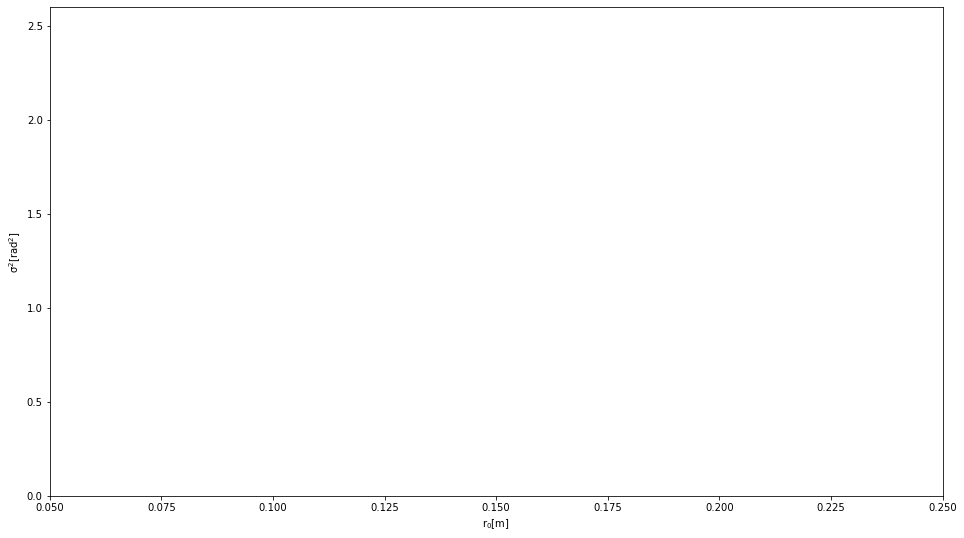

In [48]:
# animation for IDL (r0[3])
crit_list = np.linspace(30,38,8).astype(int)
print(crit_list)

def animate_IDL (i):
    plt.clf()
    ax.clear()
    
    ind = np.where(crit_IDL[crit_list[i]] == np.min(crit_IDL[crit_list[i]]))
    
    plt.xlabel(r'$\mathrm{r_0[m]}$')
    plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
    
    J0 = ((crit_IDL[crit_list[i]] - np.min(crit_IDL[crit_list[i]]))/np.min(crit_IDL[crit_list[i]])) + 1e-4 
    #J0 = (J-min(J))/min(J) + 1e-4
    plt.pcolormesh(x,y,np.log10(J0),linewidth=1, shading='auto')
    plt.plot(true_r0[3],true_sig2[i], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
    plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

    plt.colorbar(label = r'$\mathrm{log_{10} (J0)}$')
#     print("Case %d" %(crit_list[i]))
#     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
#     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
    plt.title('Supervised Criterion Map(IDL) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' 
              %(true_r0[3],true_sig2[i], 100*strehl[crit_list[i]]), fontsize = 12)
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
    plt.draw()

fig = plt.figure()
ax = plt.subplot()
ax.set_ylim(y.min(), y.max())
ax.set_xlim(x.min(), x.max())
ax.set_xlabel(r'$\mathrm{r_0[m]}$')
ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
ax.set_aspect('auto')
plt.pcolormesh(x,y,np.log10(crit_IDL[0]),linewidth=1, shading='auto')
tx = ax.set_title('Frame 0')
    
ani_IDL = animation.FuncAnimation(fig, animate_IDL, frames = len(crit_list), interval = 500)
HTML(ani_IDL.to_html5_video())

In [ ]:
# # animation for IDL (r0[4])
# crit_list = np.linspace(40,48,8).astype(int)
# print(crit_list)

# def animate_IDL (i):
#     plt.clf()
#     ax.clear()
    
#     ind = np.where(crit_IDL[crit_list[i]] == np.min(crit_IDL[crit_list[i]]))
    
#     plt.xlabel(r'$\mathrm{r_0[m]}$')
#     plt.ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
    
#     J0 = ((crit_IDL[crit_list[i]] - np.min(crit_IDL[crit_list[i]]))/np.min(crit_IDL[crit_list[i]])) + 1e-4 
#     #J0 = (J-min(J))/min(J) + 1e-4
#     plt.pcolormesh(x,y,np.log10(J0),linewidth=1, shading='auto')
#     plt.plot(true_r0[4],true_sig2[i], marker='s', markerfacecolor='none', color='w', markersize = 15, label = 'True PSF parameter')    
#     plt.plot(x[ind[1]],y[ind[0]], marker='^', markerfacecolor='none', color='w', markersize = 15, label = 'Estimated  PSF parameter')

#     plt.colorbar(label = r'$\mathrm{log_{10} (J0)}$')
# #     print("Case %d" %(crit_list[i]))
# #     print("True PSF parameter: r0 - %f ampl - %f " %(true_r0[i],true_sig2))
# #     print("Estimated PSF parameter: r0 - %f ampl - %f " %(x[ind[1]],y[ind[0]]))
    
#     plt.title('Supervised Criterion Map(IDL) \n[r0: %.2f [m] ampl:%.2f strehl: %.2f %% ]' 
#               %(true_r0[4],true_sig2[i], 100*strehl[crit_list[i]]), fontsize = 12)
#     plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    
#     plt.draw()

# fig = plt.figure()
# ax = plt.subplot()
# ax.set_ylim(y.min(), y.max())
# ax.set_xlim(x.min(), x.max())
# ax.set_xlabel(r'$\mathrm{r_0[m]}$')
# ax.set_ylabel(r'$\mathrm{\sigma^2 [rad^2]}$')
# ax.set_aspect('auto')
# plt.pcolormesh(x,y,np.log10(crit_IDL[0]),linewidth=1, shading='auto')
# tx = ax.set_title('Frame 0')
    
# ani_IDL = animation.FuncAnimation(fig, animate_IDL, frames = len(crit_list), interval = 500)
# HTML(ani_IDL.to_html5_video())

In [ ]:
fig = plt.figure()
ax = fig.subplots(1, 2)
ax[0].imshow(crit_map[0])
ax[1].imshow(crit_map[0])
plt.show()